In [1]:
import pandas as pd
import sketch
import plotly.graph_objects as go
from collections import Counter
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import string

In [2]:
df = pd.read_csv('../../data/raw/reviews.csv')
df.head()

Sentiment     Time                                               Text
0  positive  18/6/21  This is a very healthy dog food. Good for thei...
1  positive   7/7/21  I've been very pleased with the Natural Balanc...
2  positive  18/6/21  Before I was educated about feline nutrition, ...
3  positive   7/7/21  My holistic vet recommended this, along with a...
4  positive   1/7/21  I bought this coffee because its much cheaper ...

## Sentiment distribution

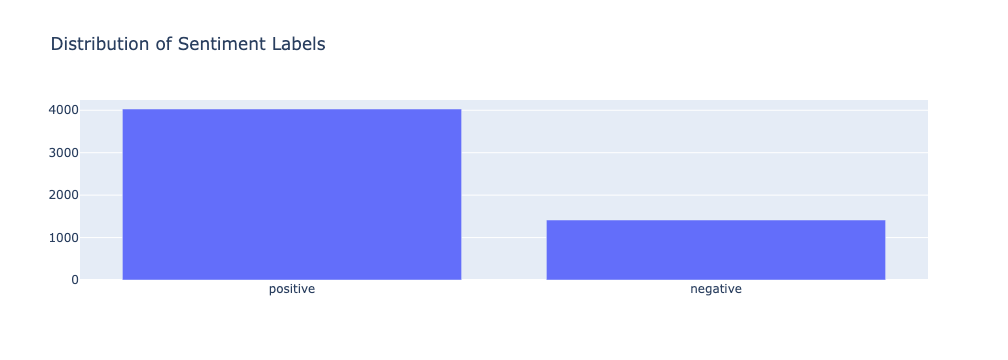

In [3]:
# Count the number of reviews for each sentiment
sentiment_counts = df['Sentiment'].value_counts()
data = go.Bar(x=sentiment_counts.index, y=sentiment_counts.values)
layout = go.Layout(title='Distribution of Sentiment Labels')
fig = go.Figure(data=data, layout=layout)
fig.show()

As shown, the data set is slightly imbalanced with 4030 positve sentiments and 1414 negative sentiments

## Recency of the data

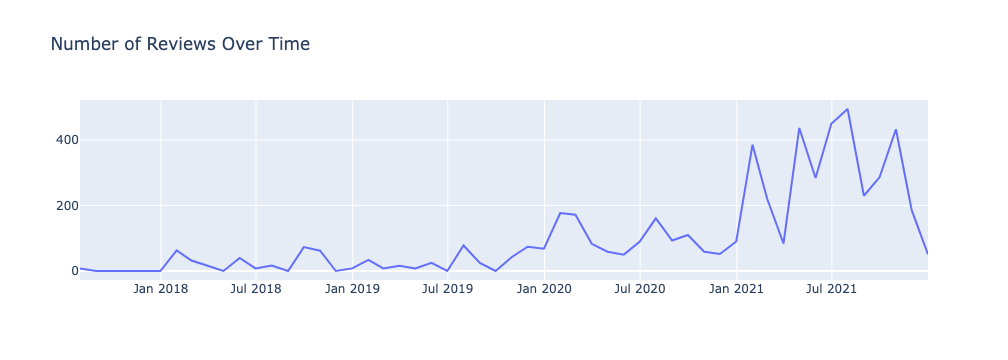

In [4]:
df['Time'] = pd.to_datetime(df['Time'])
reviews_by_date = df.groupby(pd.Grouper(key='Time', freq='M')).size()

data = go.Scatter(x=reviews_by_date.index, y=reviews_by_date.values, mode='lines')
layout = go.Layout(title='Number of Reviews Over Time')
fig = go.Figure(data=data, layout=layout)
fig.show()

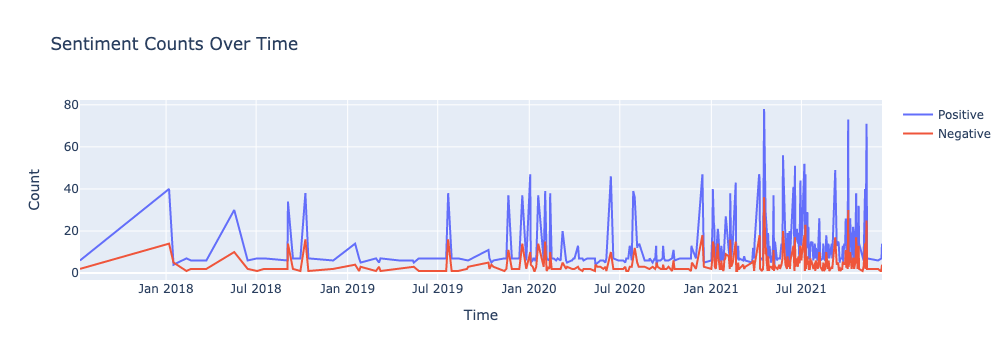

In [5]:
sentiment_counts = df.groupby(['Time', 'Sentiment']).size().reset_index(name='count')

fig = go.Figure()
fig.add_trace(go.Scatter(x=sentiment_counts[sentiment_counts['Sentiment'] == 'positive']['Time'], 
                         y=sentiment_counts[sentiment_counts['Sentiment'] == 'positive']['count'], 
                         mode='lines', name='Positive'))

fig.add_trace(go.Scatter(x=sentiment_counts[sentiment_counts['Sentiment'] == 'negative']['Time'], 
                         y=sentiment_counts[sentiment_counts['Sentiment'] == 'negative']['count'], 
                         mode='lines', name='Negative'))
fig.update_layout(title='Sentiment Counts Over Time', xaxis_title='Time', yaxis_title='Count')
fig.show()

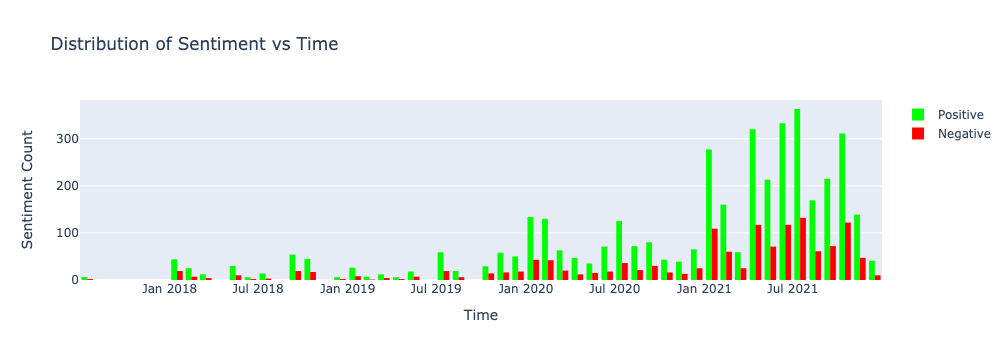

In [6]:
positive_trace = go.Histogram(x=df[df['Sentiment'] == 'positive']['Time'], 
                              name='Positive', 
                              marker_color='#00FF00')
negative_trace = go.Histogram(x=df[df['Sentiment'] == 'negative']['Time'], 
                              name='Negative', 
                              marker_color='#FF0000')
fig = go.Figure()
fig.add_trace(positive_trace)
fig.add_trace(negative_trace)
fig.update_layout(title='Distribution of Sentiment vs Time', xaxis_title='Time', yaxis_title='Sentiment Count')
fig.show()

## Exploring reviews columns

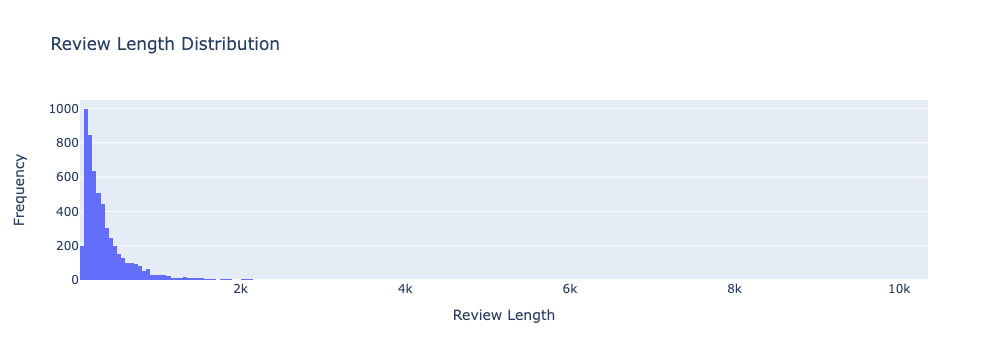

In [7]:
df['review_length'] = df['Text'].apply(len)
fig = go.Figure(data=[go.Histogram(x=df['review_length'])])
fig.update_layout(
    title="Review Length Distribution",
    xaxis_title="Review Length",
    yaxis_title="Frequency"
)
fig.show()

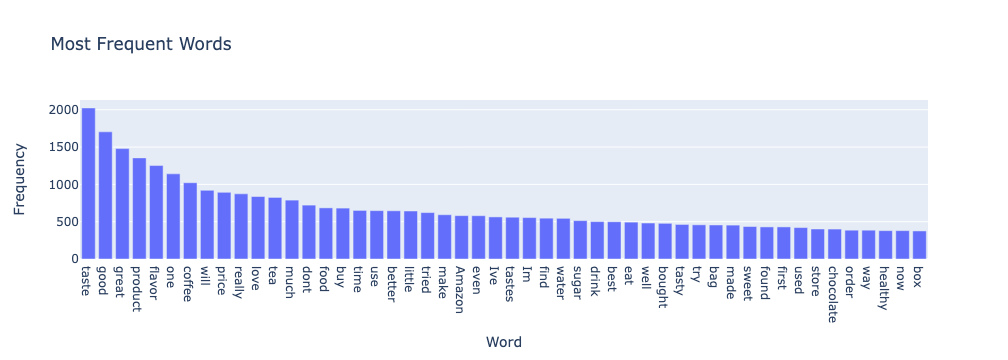

In [8]:
reviews_text = " ".join(df['Text'])
# remove <br> tags from the text
reviews_text = re.sub(r'<br\s?\/?>', ' ', reviews_text)
# remove punctuation from the text
reviews_text = reviews_text.translate(str.maketrans('', '', string.punctuation))
# remove stop words from the text
stopwords = set(STOPWORDS)
words = [w for w in reviews_text.split() if w.lower() not in stopwords]

word_counts = Counter(words).most_common(50)
fig = go.Figure([go.Bar(x=[w[0] for w in word_counts], y=[w[1] for w in word_counts])])
fig.update_layout(title="Most Frequent Words", xaxis_title="Word", yaxis_title="Frequency")
fig.show()

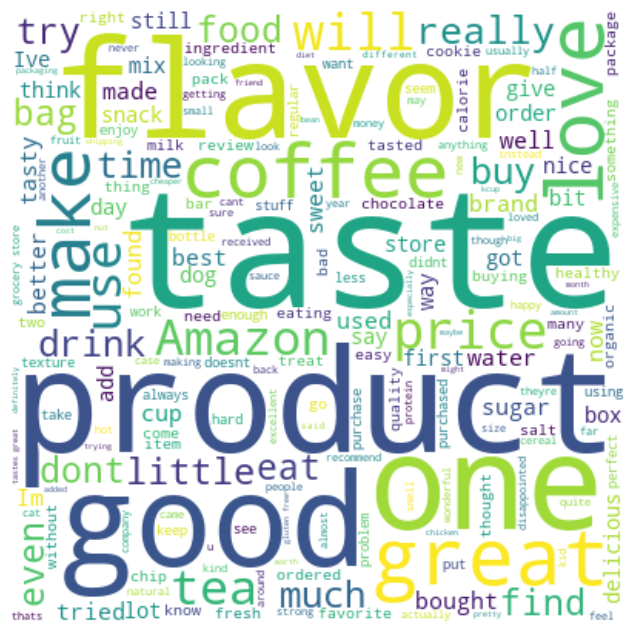

In [9]:
# create a wordcloud of the most frequent words
wordcloud = WordCloud(width=400, height=400, background_color="white", stopwords=stopwords).generate(reviews_text)
fig = plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

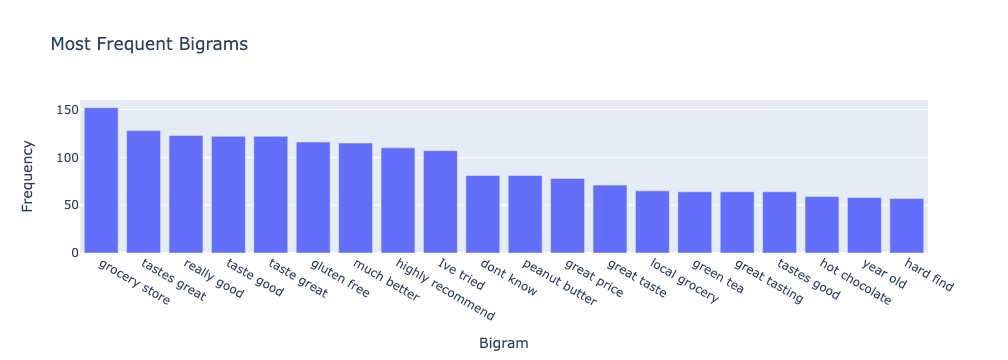

In [10]:
# get the most frequent bigrams and their counts, filtering out those that contain stop words
bigrams = [b for b in zip(words[:-1], words[1:]) if b[0].lower() not in stopwords and b[1].lower() not in stopwords]
bigram_counts = Counter(bigrams).most_common(20)
fig = go.Figure([go.Bar(x=[" ".join(b) for b in [w[0] for w in bigram_counts]], y=[w[1] for w in bigram_counts])])
fig.update_layout(title="Most Frequent Bigrams", xaxis_title="Bigram", yaxis_title="Frequency")
fig.show()

Conclusion:
- Amazon dataset 
- Mainly f&b/grocery products reviewing taste and quality of a product
- Coffee, tea, peanut butter, hot chocolate are some of the products
- More Positive sentiments than negative sentiments (products doing fairly well)
- Date range of data is from 2017-2021 but the number of reviews really exploded in 2020-2021 (Relation with Covid and online shopping?)

Next steps:
- Explore the brand these reviews are for
- Try to pin down the exact company
- Knowing the domain that this dataset is for, use transfer learning to build a relevant pre-trained model to improve.